## Plot zonal-mean total column ozone

Solutions plotting the CCMI2022 ensemble members and ensemble mean.

In [1]:
# need to import cfplot before cf due to issues with matplotlib and esmpy
import cfplot as cfp
import cf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# define the locations of the various datasets
# CCMI2022 refD1 ensemble
ensdata='/home/ubuntu/Tutorials/UMvn13.0/data/toz_Amon_UKESM1-StratTrop_refD1_r*i1p1f2_gn_19600101-20190101.nc'
# CCMI1 refC1
ccmidata='/home/ubuntu/Tutorials/UMvn13.0/data/toz_monthly_UMUKCA-UCAM_refC1_r1i1p1_*.nc'
# UKCA model data from ACSIS project, nudged to ERA5
ukcadata='/home/ubuntu/Tutorials/UMvn13.0/data/u-*/apm.pp/*.pp'
# Bodeker Scientific TCO dataset - https://www.bodekerscientific.com/data/total-column-ozone
# this has been preprocessed into a single file using ncks, ncatted, and ncrcat
# for i in `ls *.nc`; do echo $i; ncks -O --mk_rec_dmn time $i $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a created,global,d,, $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a units,longitude,o,c,degrees_east $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a units,latitude,o,c,degrees_north $i; done
# ncrcat BSFilledTCO_V3.4.1_????_Monthly.nc ../BSFilledTCO_V3.4.1_Monthly.nc
obsdata='/home/ubuntu/Tutorials/UMvn13.0/data/Bodeker_3.4.1/*.nc'
# We would like to thank Bodeker Scientific, funded by the New Zealand Deep South National 
# Science Challenge, for providing the combined NIWA-BS total column ozone database.

In [3]:
# read-in the data
# 3x ensemble members for CCMI2022
inens=cf.read(ensdata, select='equivalent_thickness_at_stp_of_atmosphere_ozone_content')

In [4]:
# CCMI2022 data is in units of m rather than Dobson units, so will need to convert
duconv=1.0e5

# ensemble from CCMI2022
ens=cf.FieldList()
for f in inens:
    # delete auxillary coordinates as these might cause problems with some operations
    f.del_construct('forecast_period')
    f.del_construct('forecast_reference_time')
    # convert to DU for this set of data
    f.data=f.data/duconv
    f.override_units('DU', inplace=True)
    ens.append(f)

In [5]:
# calculate ensemble mean
s=list(ens[0].data.shape)
s.append(len(ens))

arr=np.zeros(s)
for i in range(len(ens)):
    arr[:,:,:,i]=ens[i].array[:,:,:]
darr=np.mean(arr,axis=3)
ensmean=ens[0].copy()
ensmean.data=darr

In [6]:
# zonal mean
ens_zm=cf.FieldList()
for f in ens:
    g=f.collapse('X: mean').squeeze()
    ens_zm.append(g)

ensmean_zm=ensmean.collapse('X: mean').squeeze()

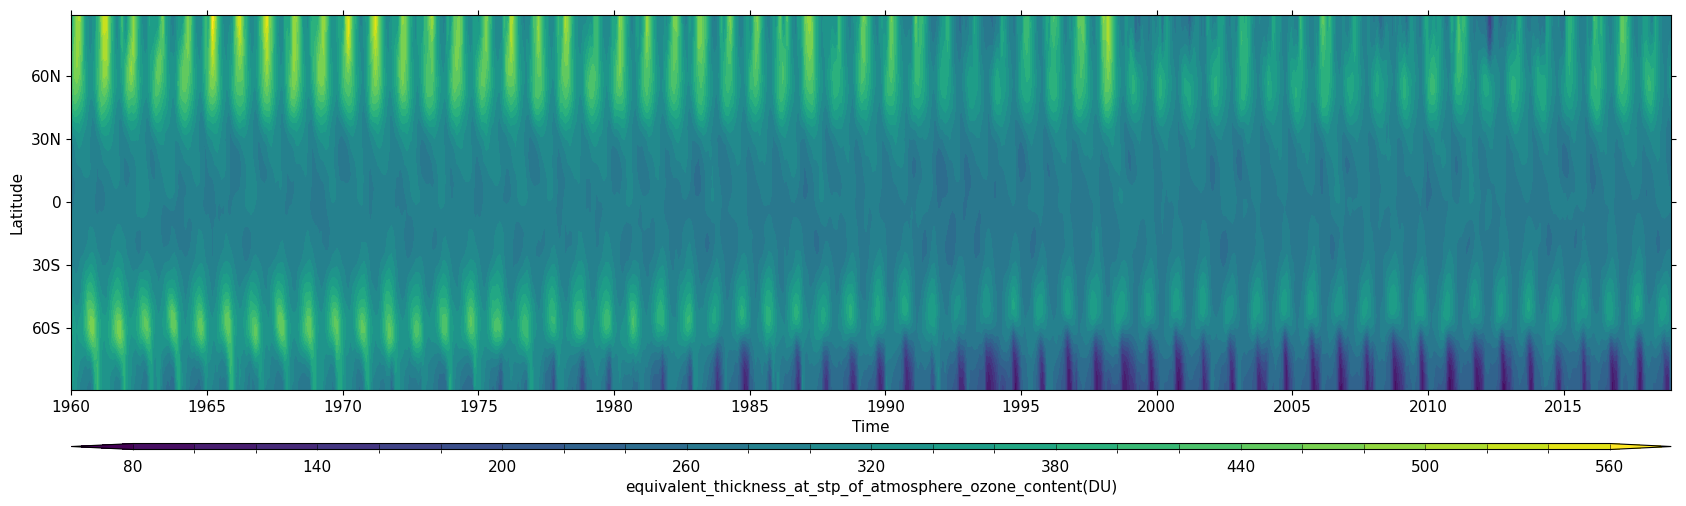

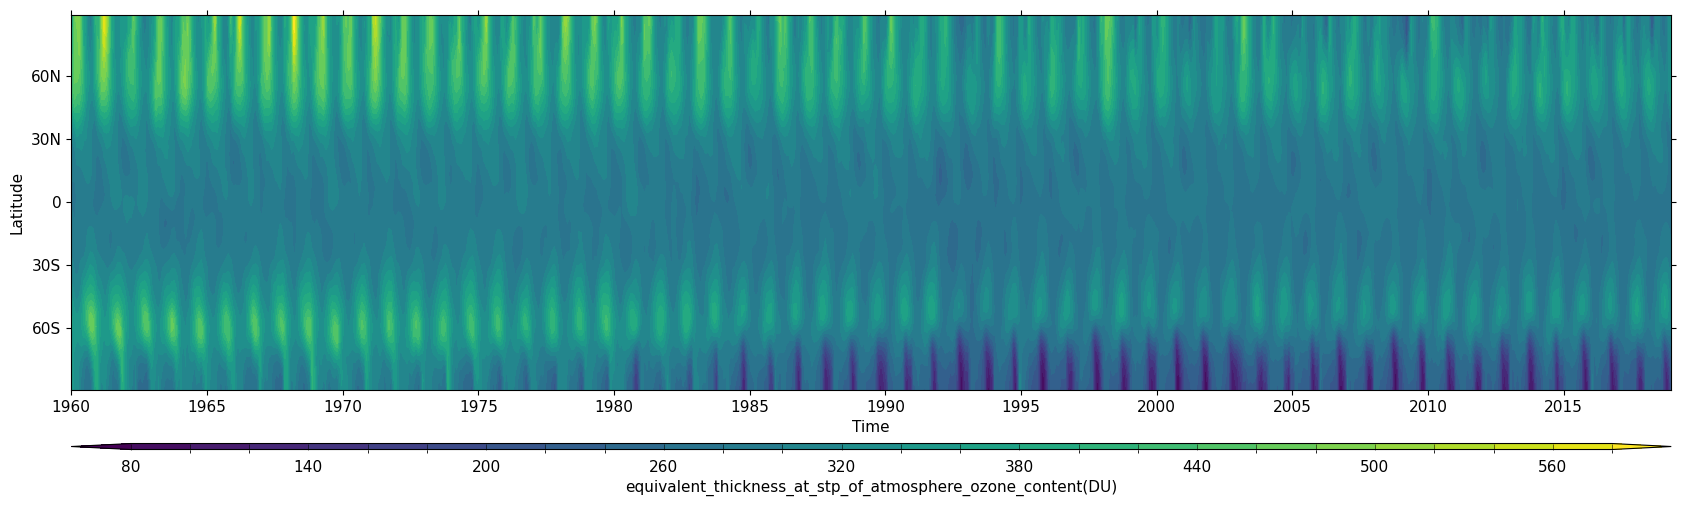

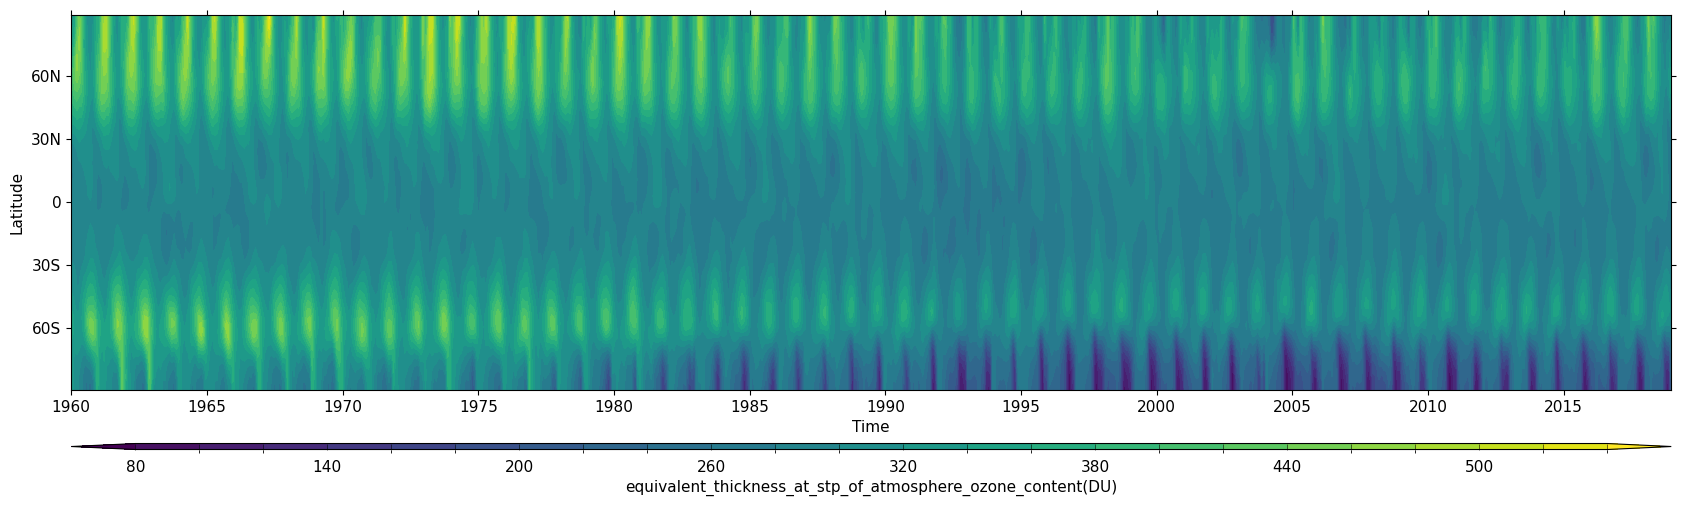

In [7]:
for f in ens_zm:
    # plot the data - need to swap the axes due to how cf-plot works by default
    cfp.gopen(figsize=(20,5))
    cfp.con(f, lines=False, swap_axes=True)
    cfp.gclose()

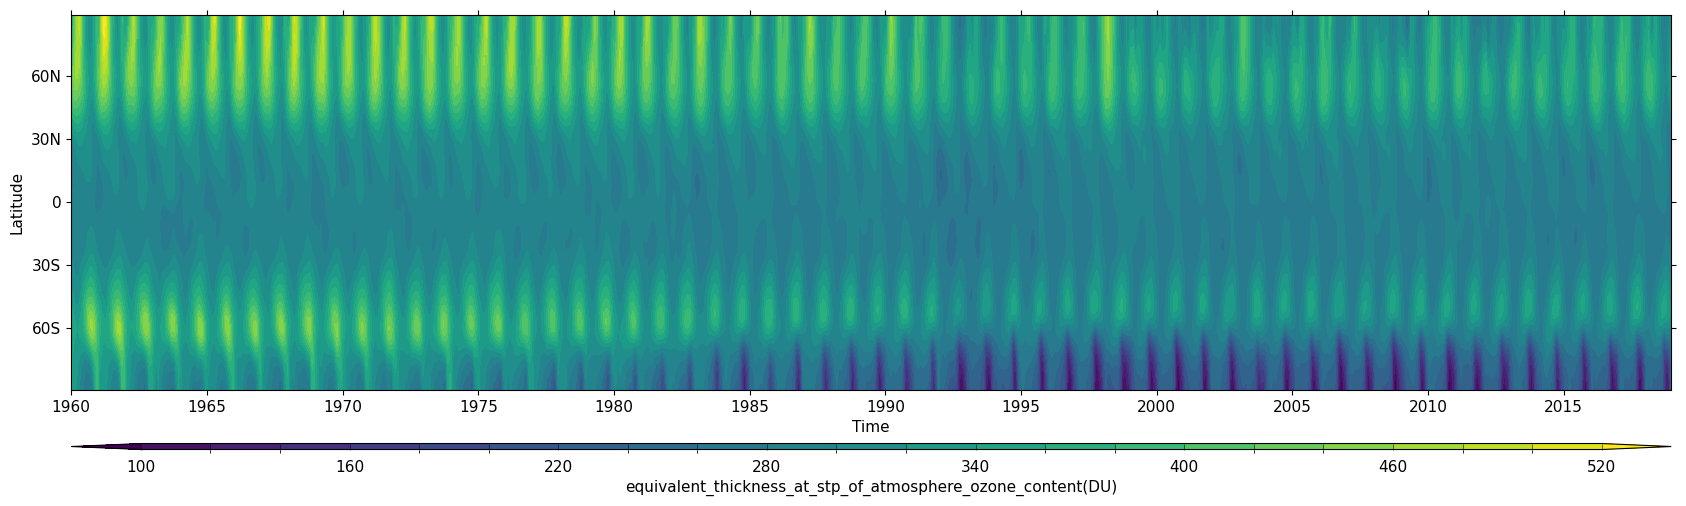

In [8]:
# plot the data - need to swap the axes due to how cf-plot works by default
cfp.gopen(figsize=(20,5))
cfp.con(ensmean_zm, lines=False, swap_axes=True)
cfp.gclose()